In [6]:
import pandas as pd
import numpy as np
from datetime import datetime

df1= pd.read_excel('PSP_Jan_Feb_2019.xlsx')
drop_list=[]

for i in range(len(df1)-1):
    if df1.loc[i,'country']==df1.loc[i+1,'country'] and df1.loc[i,'amount']==df1.loc[i+1,'amount']:
        dt1 = df1.loc[i,'tmsp']
        dt2 = df1.loc[i+1,'tmsp']
        delta=dt2-dt1
        if delta.seconds<=60:
            drop_list.append(i)  

[0,
 2,
 5,
 8,
 10,
 11,
 12,
 13,
 16,
 17,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 31,
 32,
 33,
 36,
 37,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 50,
 52,
 53,
 54,
 59,
 61,
 63,
 64,
 66,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 89,
 91,
 92,
 93,
 95,
 96,
 97,
 98,
 100,
 101,
 103,
 105,
 106,
 108,
 109,
 110,
 111,
 113,
 115,
 116,
 120,
 121,
 122,
 123,
 126,
 127,
 128,
 134,
 135,
 136,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 157,
 158,
 159,
 160,
 162,
 163,
 166,
 168,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 190,
 191,
 194,
 196,
 197,
 200,
 202,
 207,
 208,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 221,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 231,
 232,
 236,
 238,
 239,
 240,
 244,
 245,
 246,
 247,
 248,
 250,
 251,
 252,
 253,
 255,
 256,
 257,
 262,
 263,
 267,
 268,
 270,
 273,
 275,
 276,
 277,
 280,
 281,
 282,
 288,
 292,
 294,
 295,
 296,
 297,
 299,
 300,
 301

In [10]:
raw_dataset = df1.drop(df1.index[drop_list])
raw_dataset.shape[0]

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
50401,50401,2019-02-28 23:35:07,Austria,123,1,UK_Card,0,Visa
50402,50402,2019-02-28 23:36:08,Switzerland,242,1,UK_Card,1,Diners
50403,50403,2019-02-28 23:43:36,Switzerland,208,0,Simplecard,0,Master
50405,50405,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa
50409,50409,2019-02-28 23:48:19,Austria,91,1,Moneycard,0,Master


In [4]:
prepros_dataset=pd.DataFrame()
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,2]=='Germany':
        prepros_dataset.loc[i,'Is_Germany']=1
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Austria':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=1
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Switzerland':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [5]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,5]=='UK_Card':
        prepros_dataset.loc[i,'Is_UK_Card']=1
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Simplecard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=1
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Moneycard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=1
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Goldcard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,7]=='Visa':
        prepros_dataset.loc[i,'Is_Visa']=1
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Diners':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=1
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Master':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
raw_dataset['amount'].describe(percentiles=[.05,.95])

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
5%          42.450000
50%        201.000000
95%        365.000000
max        630.000000
Name: amount, dtype: float64

In [7]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,3]<100:
        prepros_dataset.loc[i,'amount0']=1
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=0
    elif 100<= raw_dataset.iloc[i,3] <=300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=1
        prepros_dataset.loc[i,'amount2']=0
    elif raw_dataset.iloc[i,3] >300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=1
        
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
df=raw_dataset
df['month']=raw_dataset['tmsp'].dt.month
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,8]==1:
        prepros_dataset.loc[i,'Is_Jan']=1
        prepros_dataset.loc[i,'Is_Feb']=0
    elif  raw_dataset.iloc[i,8]==2:
        prepros_dataset.loc[i,'Is_Jan']=0
        prepros_dataset.loc[i,'Is_Feb']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Is_Jan,Is_Feb
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
df['day']=raw_dataset['tmsp'].dt.day

In [11]:
weekday=datetime.weekday(raw_dataset.at[2,'tmsp'])
print(weekday)
raw_dataset['amount'].describe(percentiles=[.05,.95])

1


count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
5%          42.450000
50%        201.000000
95%        365.000000
max        630.000000
Name: amount, dtype: float64

In [9]:
for i in range(len(raw_dataset)):
    weekday=datetime.weekday(raw_dataset.at[i,'tmsp'])
    if  weekday==0:
        prepros_dataset.loc[i,'Monday']=1
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==1:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=1
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==2:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=1
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==3:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=1
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==4:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=1
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==5:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=1
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==6:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,amount2,Is_Jan,Is_Feb,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['hour']=raw_dataset['tmsp'].dt.hour
df.tail()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card,month,hour
50405,50405,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa,2,23
50406,50406,2019-02-28 23:46:48,Austria,91,0,UK_Card,0,Master,2,23
50407,50407,2019-02-28 23:47:04,Austria,91,0,UK_Card,0,Master,2,23
50408,50408,2019-02-28 23:47:36,Austria,91,0,UK_Card,0,Master,2,23
50409,50409,2019-02-28 23:48:19,Austria,91,1,Moneycard,0,Master,2,23


In [10]:
for i in range(len(raw_dataset)):
    hour=raw_dataset.iloc[i]['tmsp'].hour
    for j in range (24):
        if j==hour:
            prepros_dataset.loc[i,'hour'+ str(j)]=1
        else:
            prepros_dataset.loc[i,'hour'+ str(j)]=0
            
prepros_dataset.tail(50)

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
50360,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50361,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50362,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50363,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50365,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50366,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50367,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50369,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
for i in range(len(raw_dataset)):
    prepros_dataset.loc[i,'3D_secured']=raw_dataset.loc[i,'3D_secured']
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,3D_secured
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
prepros_dataset.to_csv('preprocessed.zip')

<BarContainer object of 4 artists>

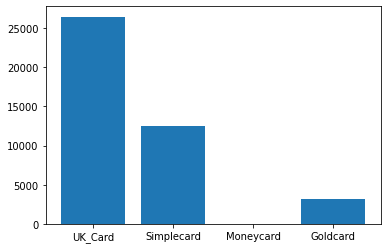

In [14]:
import matplotlib.pyplot as plt
names=['UK_Card','Simplecard','Moneycard','Goldcard']
values=[(raw_dataset.PSP=='UK_Card').sum(),(raw_dataset.PSP=='Simplecard').sum(),(raw_dataset.PSP=='Monrycard').sum()
        ,(raw_dataset.PSP=='Goldcard').sum()]
plt.bar(names,values)

<BarContainer object of 3 artists>

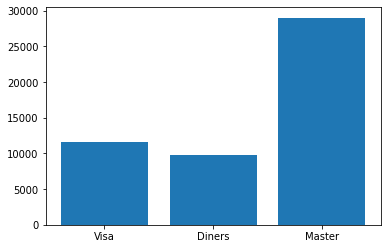

In [15]:
names=['Visa','Diners','Master']
values=[(raw_dataset.card=='Visa').sum(),(raw_dataset.card=='Diners').sum(),(raw_dataset.card=='Master').sum()]
plt.bar(names,values)